In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [ ]:
uri = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"
passageiros = pd.read_csv(uri)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


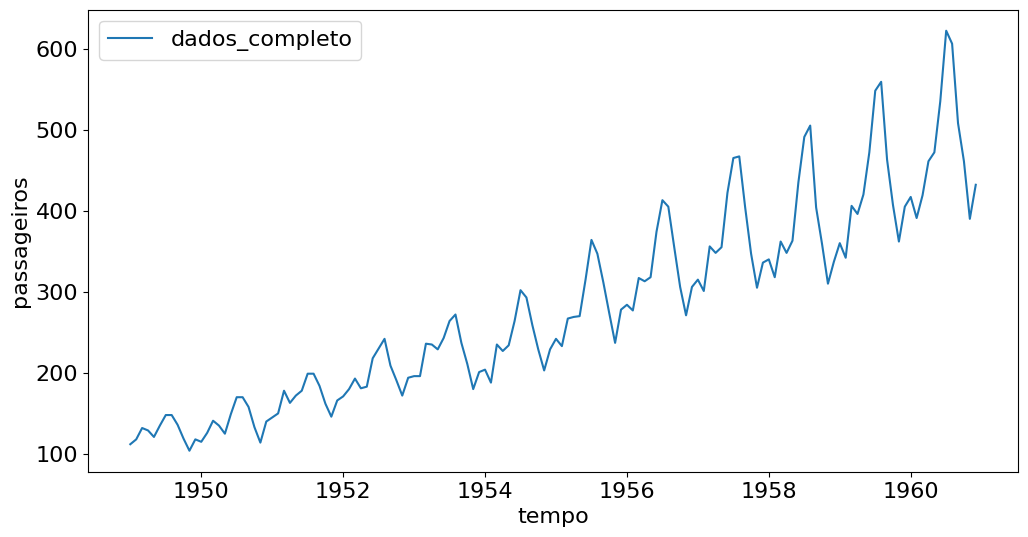

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6) #Aumentando o tamanho da figura
mpl.rcParams['font.size'] = 16  #Aumentando o tamanho da letra
dados_completos = sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dados_completo' ) #Plotando os dados

#Normalizando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()
sc.fit(passageiros)
dados_escalados = sc.transform(passageiros)

In [ ]:
x= dados_escalados[:,0]
y= dados_escalados[:,1]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

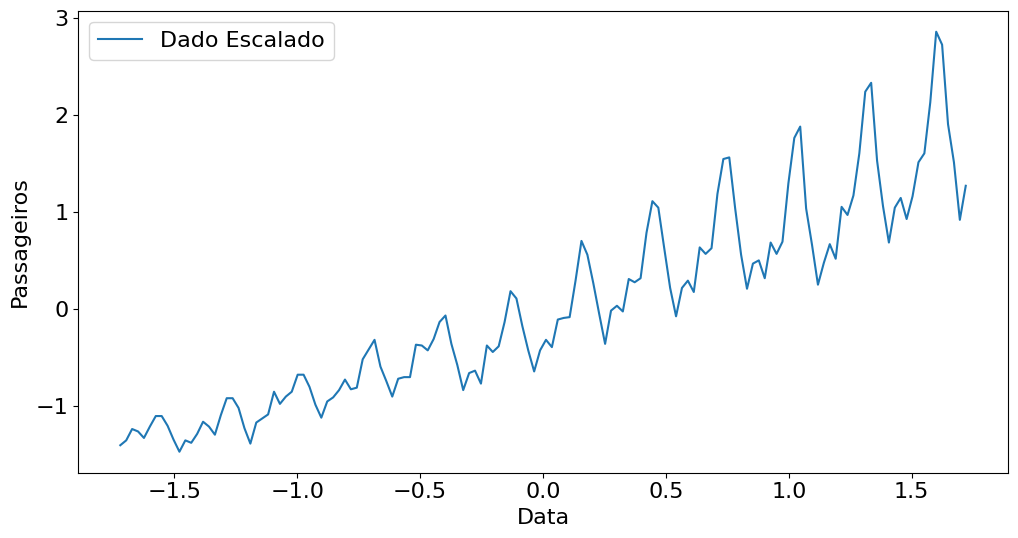

In [ ]:
sns.lineplot(x=x, y=y, label='Dado Escalado') #Plotando os dados
plt.ylabel('Passageiros')
plt.xlabel('Data')

#Dividindo em treino e teste

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

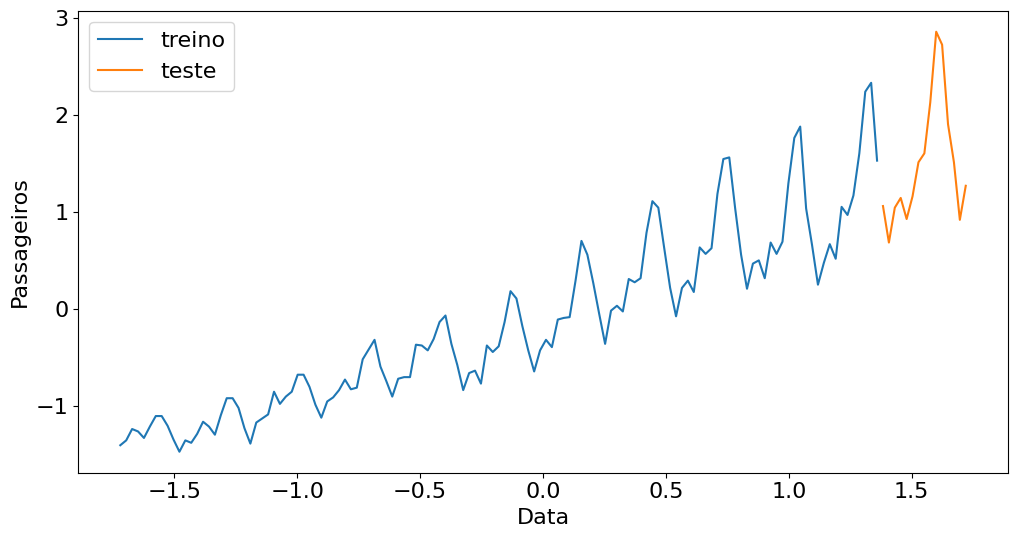

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

#Usando Rede Neural para fazer uma Regressão  Linear

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, input_dim=1, kernel_initializer = 'Ones', use_bias = False, activation = 'linear' ))

In [ ]:
regressor.compile(loss= 'mean_squared_error', optimizer ='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 1ms/step


<Axes: >

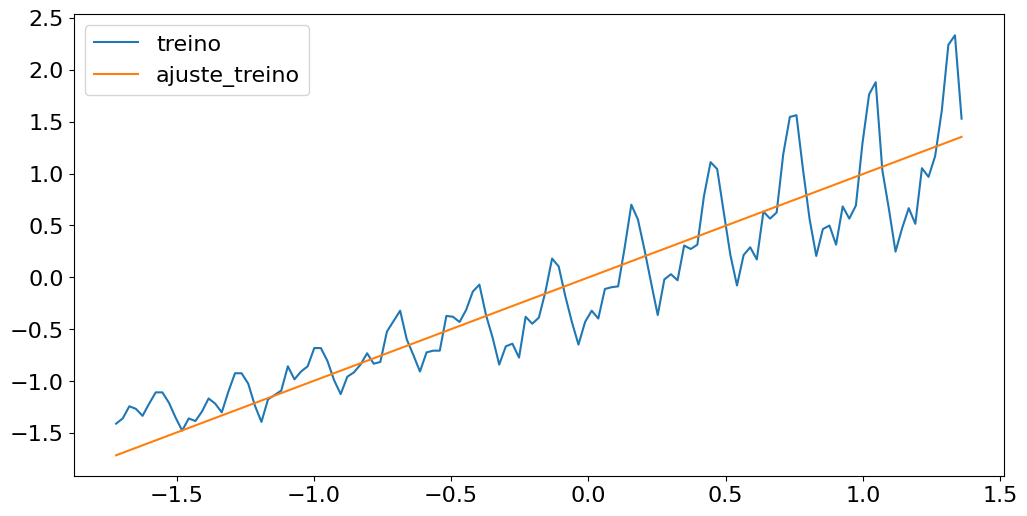

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label= 'treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

##Transformando os dados em número de passageiros

In [ ]:
d = {'tempo':xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

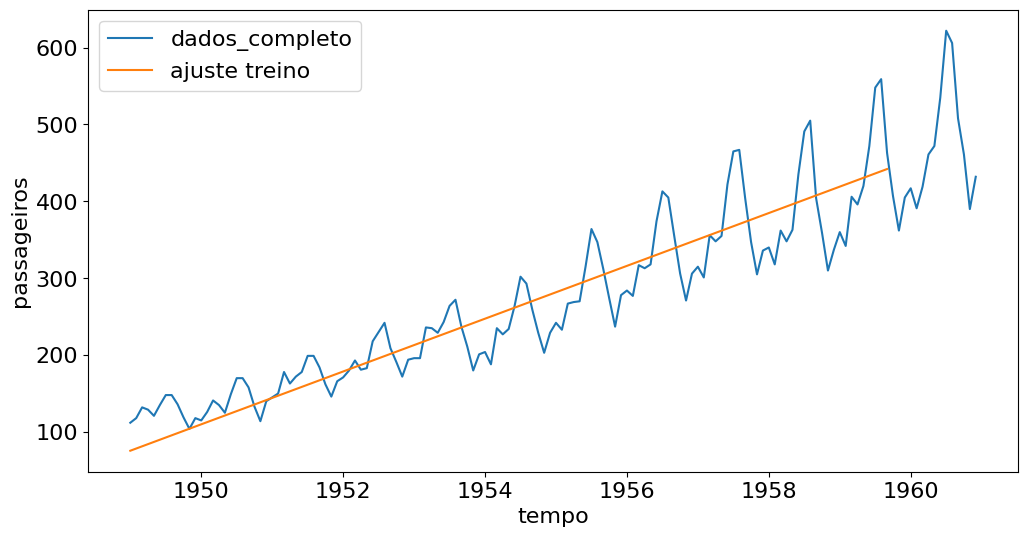

In [ ]:
sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dados_completo' ) #Plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf, label='ajuste treino' ) #Plotando os dados

In [ ]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 13ms/step


In [ ]:
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_trans_teste = pd.DataFrame(resultado_transf_teste)


<Axes: xlabel='tempo', ylabel='passageiros'>

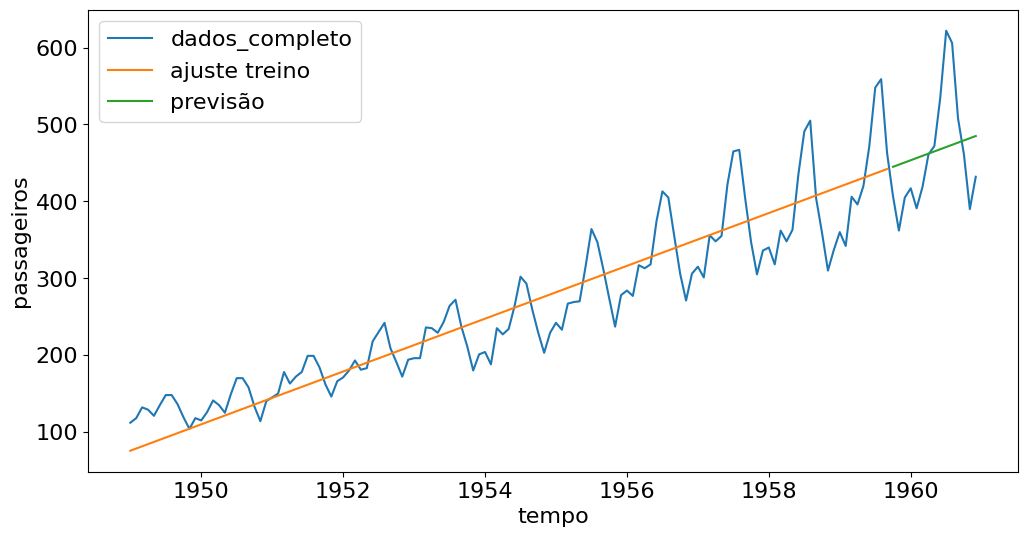

In [ ]:
resultado_trans_teste.columns = ['tempo','passageiros']
sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dados_completo' ) #Plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf, label='ajuste treino' ) #Plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=resultado_trans_teste, label='previsão')

#Adicionando mais camadas

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',activation ='linear', use_bias = False))
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',activation ='linear', use_bias = False))
regressor2.add(Dense(1,input_dim=1, kernel_initializer='random_uniform',activation ='linear', use_bias = False))

In [ ]:
regressor2.compile(loss= 'mean_squared_error', optimizer ='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino,ytreino,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8103
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8098
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8095
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8091
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8085
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8077
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8065
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8048
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8021
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7984
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7934
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7870
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [ ]:
regressor2.fit(xtreino,ytreino,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1235
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1256
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1263
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1260
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1256
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1245
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1231
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1229
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1243
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

In [ ]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 45ms/step


<Axes: >

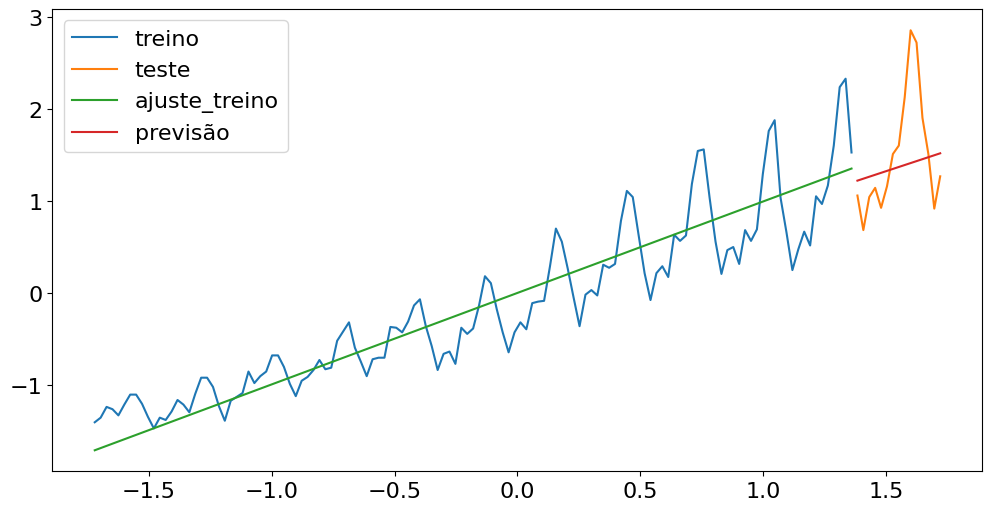

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0], label= 'previsão')

#Alterando a função de ativação

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',activation ='sigmoid', use_bias = False))
regressor3.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',activation ='sigmoid', use_bias = False))
regressor3.add(Dense(1,input_dim=1, kernel_initializer='random_uniform',activation ='linear', use_bias = False))

In [ ]:
regressor3.compile(loss= 'mean_squared_error', optimizer ='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor3.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7904
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7867
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7849
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7836
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7828
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7814
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7805
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7802
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7799
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7797
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7798
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7796
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_predict_teste = regressor3.predict(xteste)
y_predict = regressor3.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

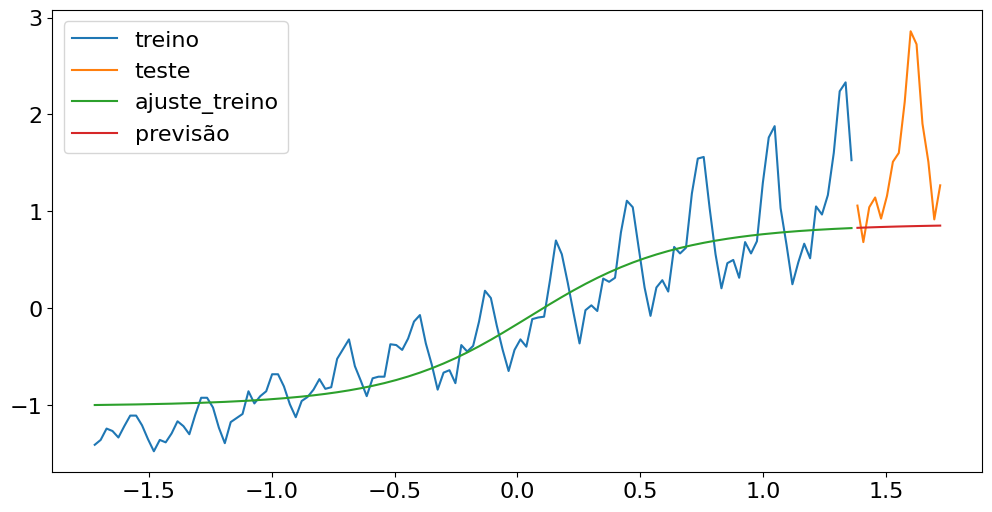

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0], label= 'previsão')

# Atrasando os dados

Em previsão de séries temporais usando redes neurais, atrasar os dados significa usar observações passadas para prever futuras. Isso cria uma relação entre dados anteriores e futuros, estabelecendo dependência temporal nas entradas. A técnica ajuda o modelo a aprender padrões temporais, como sazonalidades e tendências. Existem várias abordagens, como usar N períodos anteriores como características ou criar uma série temporal com atraso. A escolha depende do problema específico e do tipo de rede neural usada.

In [ ]:
import numpy as np

In [ ]:
def separa_dados (vetor,n_passos):
  X_novo, y_novo = [],[]

  for i in range (n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo


Entendendo esta função:  O parâmetro n_passos é um número inteiro que você deve fornecer ao chamar a função separa_dados(vetor, n_passos). Ele representa quantos passos no tempo você deseja usar como entrada para prever o próximo valor na série temporal.

Para entender melhor o propósito de n_passos, vamos considerar um exemplo prático. Suponha que você tenha um vetor de dados de séries temporais como este:


**vetor = [10, 15, 20, 25, 30, 35, 40, 45, 50]**


Se você definir n_passos como 3, a função separa_dados(vetor, 3) irá criar subsequências de comprimento 3 a partir do vetor de dados. Então, X_novo conterá subsequências de 3 elementos e y_novo conterá os elementos seguintes na sequência. O resultado seria algo assim:


**X_novo = [[10, 15, 20],
          [15, 20, 25],
          [20, 25, 30],
          [25, 30, 35],
          [30, 35, 40],
          [35, 40, 45]]**

**y_novo = [25, 30, 35, 40, 45, 50]**


Aqui, cada sublista em X_novo contém 3 valores consecutivos do vetor original, e os valores correspondentes em y_novo são os próximos valores na sequência após cada sublista em X_novo.

O parâmetro n_passos controla quantos valores anteriores (passos no tempo) você está usando como entrada para prever o próximo valor na série temporal. Você pode ajustar esse valor de acordo com a complexidade do padrão que você espera que o modelo aprenda.


A escolha de quantos passos no tempo (n_passos) usar para prever valores futuros em uma série temporal depende do contexto e dos dados específicos do problema. Algumas diretrizes incluem realizar análise exploratória dos dados, experimentar diferentes valores e avaliar o erro do modelo com métricas como RMSE ou MAE. A paciência do modelo em relação às mudanças nos dados também é relevante. Experimentação iterativa e consultas a especialistas do domínio podem ajudar a determinar um valor adequado para n_passos. Não há uma regra fixa, sendo necessário adaptar a escolha com base na análise e no conhecimento do problema.

In [ ]:
vetor = pd.DataFrame(ytreino) [0]

In [ ]:
xtreino_novo, y_treino_novo = separa_dados(vetor, 1)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
vetor2 = pd.DataFrame(yteste) [0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

A razão para fazer isso pode ser a preparação dos dados para previsões de séries temporais, onde cada valor na série temporal é usado para prever o próximo valor. Nesse caso, n_passos é 1, o que significa que cada valor na série é usado como entrada para prever o próximo valor na série.

A transformação para uma série (vetor) e subsequências de tamanho 1 (xteste_novo e yteste_novo) pode ser útil em modelos que esperam entradas unidimensionais para cada ponto no tempo, como algumas arquiteturas de redes neurais recorrentes (por exemplo, LSTM ou GRU). Essa abordagem permite que o modelo aprenda padrões sequenciais usando cada valor individual como uma entrada para prever o próximo valor na série temporal.

#Treinando a rede

In [ ]:
regressor4 = Sequential()

In [ ]:
regressor4.add(Dense(8,input_dim=1, kernel_initializer='ones',activation ='linear', use_bias = False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',activation ='sigmoid', use_bias = False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',activation ='linear', use_bias = False))

In [ ]:
regressor4.compile(loss= 'mean_squared_error', optimizer ='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 8         
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor4.fit(xtreino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7838
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7527
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7268
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7059
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6845
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6604
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6319
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6028
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5751
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5399
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5071
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4704
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 2ms/step


<Axes: xlabel='tempo', ylabel='0'>

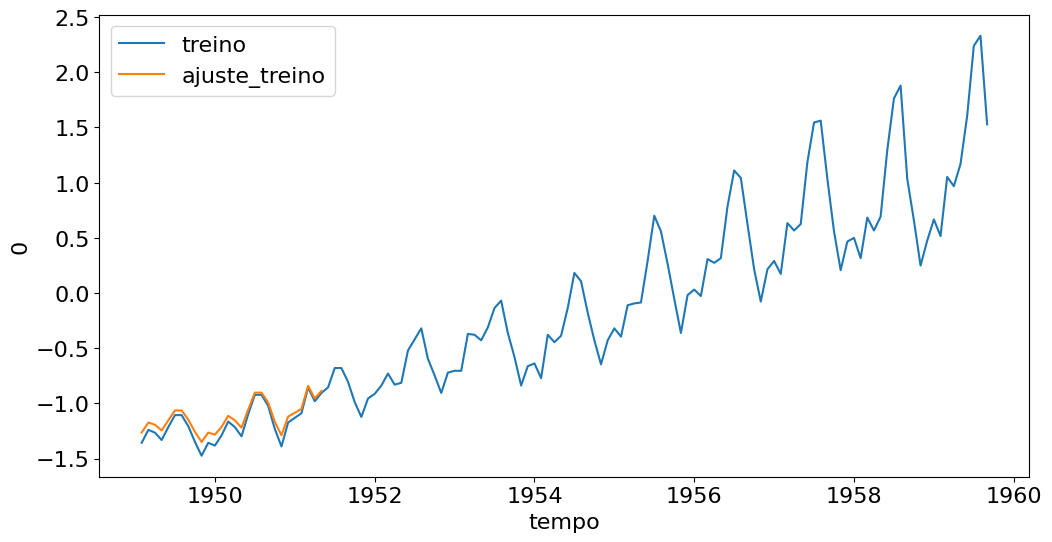

In [ ]:
sns.lineplot(x='tempo',y=y_treino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo) [0], data=passageiros[1:29], label='ajuste_treino')

In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 48ms/step


<Axes: xlabel='tempo', ylabel='0'>

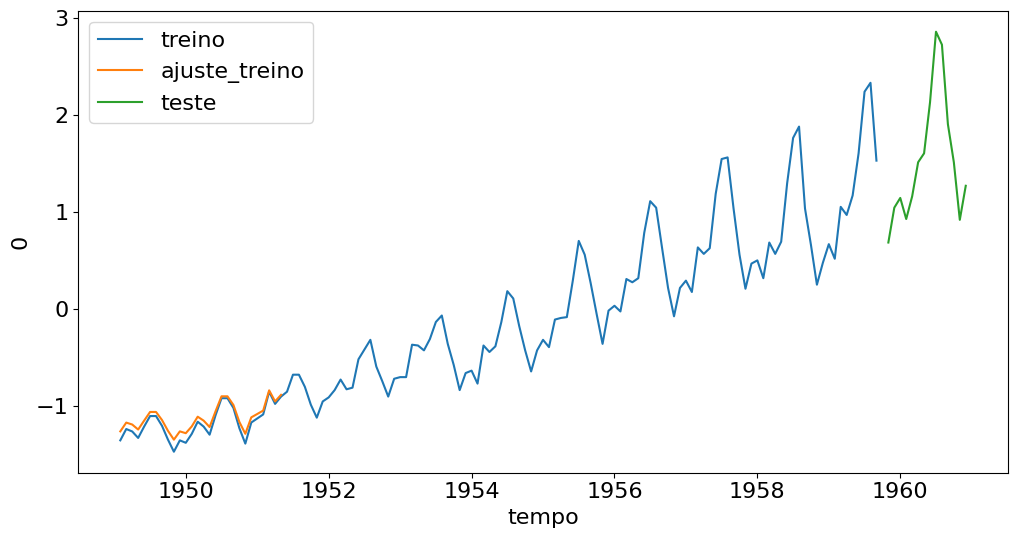

In [ ]:
sns.lineplot(x='tempo',y=y_treino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo) [0], data=passageiros[1:29], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo) [0]

<Axes: xlabel='tempo', ylabel='0'>

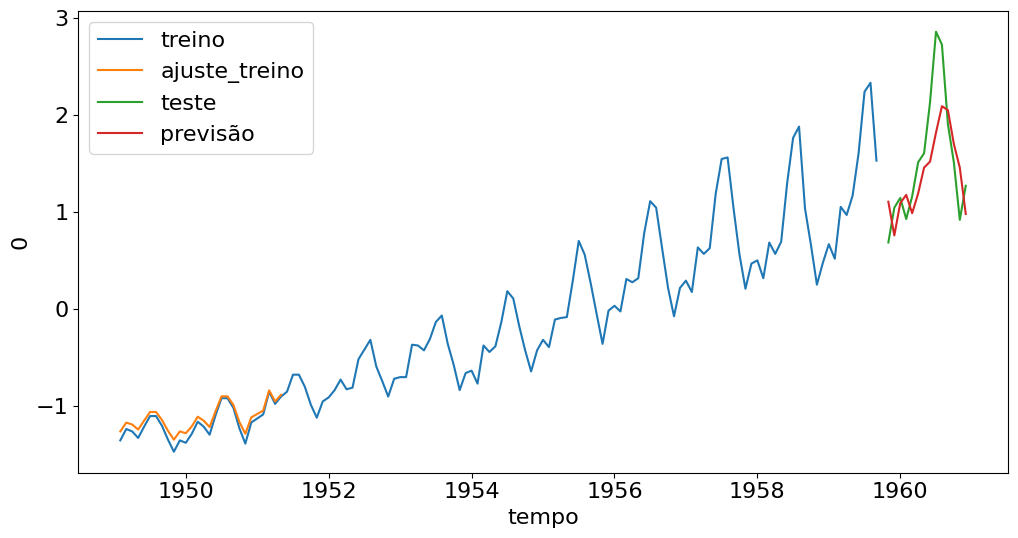

In [ ]:
sns.lineplot(x='tempo',y=y_treino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo) [0], data=passageiros[1:29], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

#Janelas

Em contextos de previsão de séries temporais, as "janelas" se referem a subsequências contínuas de dados em um conjunto de dados temporal. Em outras palavras, uma janela é um intervalo contínuo de pontos de dados em uma série temporal que é usada como entrada para prever o próximo valor na sequência. Essa técnica é comumente usada em problemas de previsão de séries temporais, onde a ideia é criar múltiplas janelas deslizantes ao longo da série temporal para treinar um modelo.

Por exemplo, considere a seguinte série temporal:


[10, 15, 20, 25, 30, 35, 40, 45, 50]

Se estivermos usando uma janela de tamanho 3, as janelas resultantes seriam:

Janela 1: [10, 15, 20] (usada para prever o próximo valor 25)

Janela 2: [15, 20, 25] (usada para prever o próximo valor 30)

Janela 3: [20, 25, 30] (usada para prever o próximo valor 35)

Janela 4: [25, 30, 35] (usada para prever o próximo valor 40)

Janela 5: [30, 35, 40] (usada para prever o próximo valor 45)

Janela 6: [35, 40, 45] (usada para prever o próximo valor 50)

Cada janela é uma subsequência contínua de tamanho 3 na série temporal original. Essas janelas são então usadas como entradas para um modelo de previsão, como uma rede neural, onde o modelo aprende a relação entre os valores na janela e os próximos valores na sequência. O processo de deslizar a janela ao longo da série temporal permite que o modelo aprenda padrões sequenciais nos dados, capturando assim a dinâmica da série temporal.

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [ ]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [ ]:
regressor5 = Sequential()

In [ ]:
regressor5.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor5.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor5.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor5.compile(loss='mean_squared_error',optimizer='adam')
regressor5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 32        
                                                                 
 dense_11 (Dense)            (None, 64)                512       
                                                                 
 dense_12 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor5.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8728
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8194
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7767
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7636
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7560
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7576
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7570
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7532
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7474
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7410
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7333
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7271
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [ ]:
y_predict_teste_novo = regressor5.predict(xteste_novo)

1/1 [==============================] - 0s 90ms/step


In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

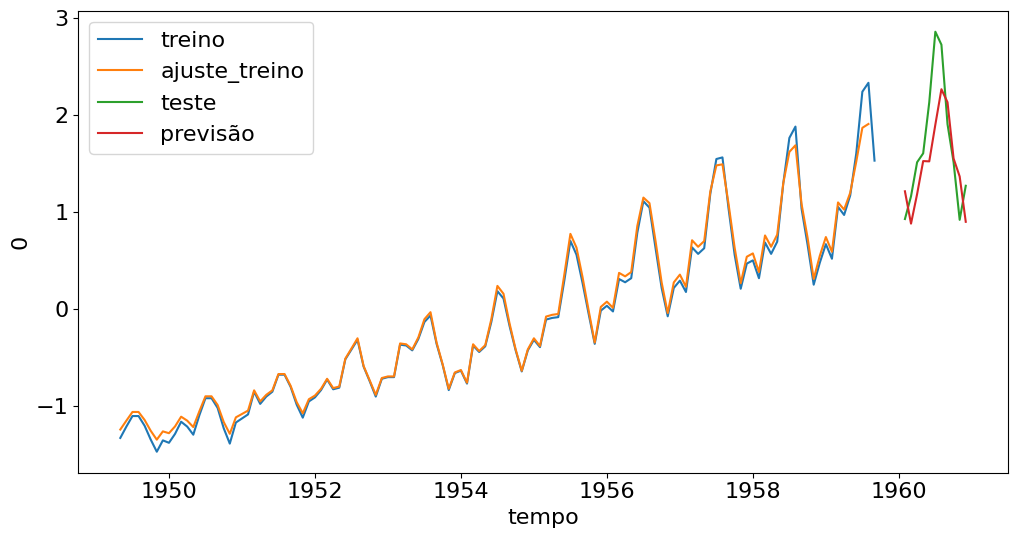

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

#Carregando um novo banco de dados e preparando os dados - Bicicletas

In [ ]:
bike = pd.read_csv('bicicletas.csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

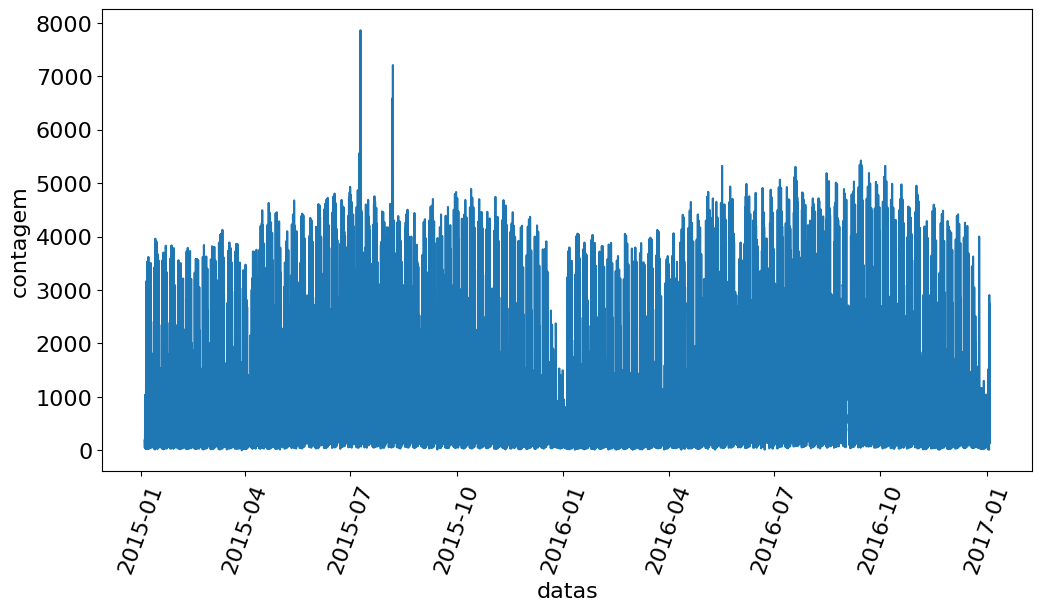

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()

In [ ]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)

In [ ]:
tamanho_teste = len(bike)-tamanho_treino

In [ ]:
ytreino = y [0:tamanho_treino]

In [ ]:
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

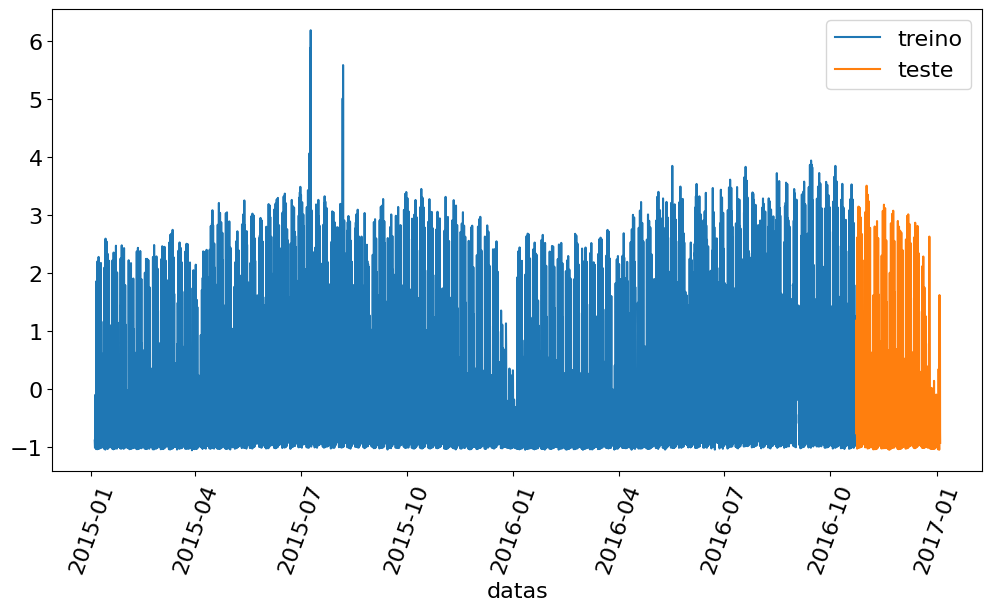

In [ ]:
sns.lineplot(x='datas', y= ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino) [0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [ ]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [ ]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

#Redes Neurais Recorrentes

Redes Neurais Recorrentes (RNNs) são um tipo de arquitetura de redes neurais projetadas para lidar com dados sequenciais ou temporais. Ao contrário das redes neurais tradicionais, as RNNs possuem loops internos que permitem que as informações sejam persistentes, permitindo que a rede mantenha uma memória das informações anteriores durante o processamento de novas entradas.

A principal característica das RNNs é a capacidade de processar sequências de dados de comprimento variável, tornando-as ideais para lidar com dados temporais, como séries temporais, texto, fala ou até mesmo genomas. A estrutura de loop interno permite que as informações fluam através da rede, tornando-as capazes de capturar padrões temporais complexos.

O funcionamento básico de uma RNN envolve a passagem de uma entrada em um determinado passo de tempo, e a saída dessa etapa é usada como entrada na próxima etapa de tempo. Cada passo de tempo na RNN processa uma entrada da sequência e atualiza seu estado interno. A saída da RNN pode ser usada para fazer previsões (em problemas de previsão de séries temporais, por exemplo) ou para gerar sequências (como em geração de texto).

Apesar de sua capacidade de lidar com sequências, RNNs tradicionais têm algumas limitações, como dificuldade em capturar dependências de longo prazo. Para lidar com esse problema, foram desenvolvidas variantes mais avançadas de RNNs, como Long Short-Term Memory (LSTM) e Gated Recurrent Unit (GRU). Essas variantes foram projetadas para preservar informações por longos períodos, tornando-as mais eficazes para modelar dependências temporais de longo alcance.

Em resumo, as Redes Neurais Recorrentes são uma classe de arquiteturas de redes neurais adequadas para lidar com dados sequenciais, graças às suas estruturas de loop interno, que permitem a captura de padrões temporais complexos em dados como séries temporais, texto e fala.

## LSTM

Uma LSTM (Long Short-Term Memory) é uma arquitetura de Rede Neural Recorrente (RNN) especializada projetada para lidar com dependências temporais de longo prazo em dados sequenciais. Ao contrário das RNNs tradicionais, que podem ter dificuldade em capturar padrões em dados sequenciais muito longos, as LSTMs possuem uma estrutura interna de memória que permite que elas aprendam e mantenham informações relevantes por períodos prolongados.

A estrutura de uma LSTM inclui unidades de memória chamadas "células", que são equipadas com três portões principais:

Portão de Entrada (Input Gate): Controla a entrada de novas informações na célula de memória.
Portão de Esquecimento (Forget Gate): Decide quais informações antigas na célula de memória devem ser descartadas ou esquecidas.
Portão de Saída (Output Gate): Regula a saída das informações da célula de memória para a próxima etapa na sequência.
Esses portões permitem que uma LSTM aprenda a manter, atualizar e descartar informações com base nos dados de entrada, garantindo que informações relevantes sejam preservadas para previsões futuras. A estrutura de portões permite que as LSTMs capturem dependências temporais de longo alcance, tornando-as adequadas para uma variedade de tarefas, como previsão de séries temporais, tradução automática, geração de texto e muito mais.

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))


In [ ]:
recorrente = Sequential()

In [ ]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))


In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')


O RMSProp é essencial para redes neurais, especialmente em cenários como as redes neurais recorrentes (RNNs), onde problemas como gradientes que explodem ou desaparecem podem surgir durante o treinamento. Ele resolve esses problemas ajustando as taxas de aprendizado de forma adaptativa para cada parâmetro da rede. Calcula uma média móvel dos quadrados dos gradientes passados e normaliza o gradiente atual por essa média. Isso impede que os gradientes se tornem excessivamente grandes (explodindo) ou muito pequenos (desaparecendo), mantendo a estabilidade do processo de treinamento. Essa técnica é crucial para garantir uma convergência eficaz e rápida, especialmente em tarefas que envolvem dados sequenciais.

In [ ]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo,yteste_novo), epochs = 100)

Epoch 1/100
490/490 [==============================] - 10s 17ms/step - loss: 0.2932 - val_loss: 0.0760
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0835 - val_loss: 0.0479
Epoch 3/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0569 - val_loss: 0.0399
Epoch 4/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0487 - val_loss: 0.0457
Epoch 5/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0439 - val_loss: 0.0288
Epoch 6/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0417 - val_loss: 0.0249
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0392 - val_loss: 0.0402
Epoch 8/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0378 - val_loss: 0.0247
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0363 - val_loss: 0.0352
Epoch 10/100
490/490 [==============================] - 8s 16ms/step - loss: 0.03

#Avaliando a LSTM

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 3s 5ms/step


<Axes: xlabel='datas'>

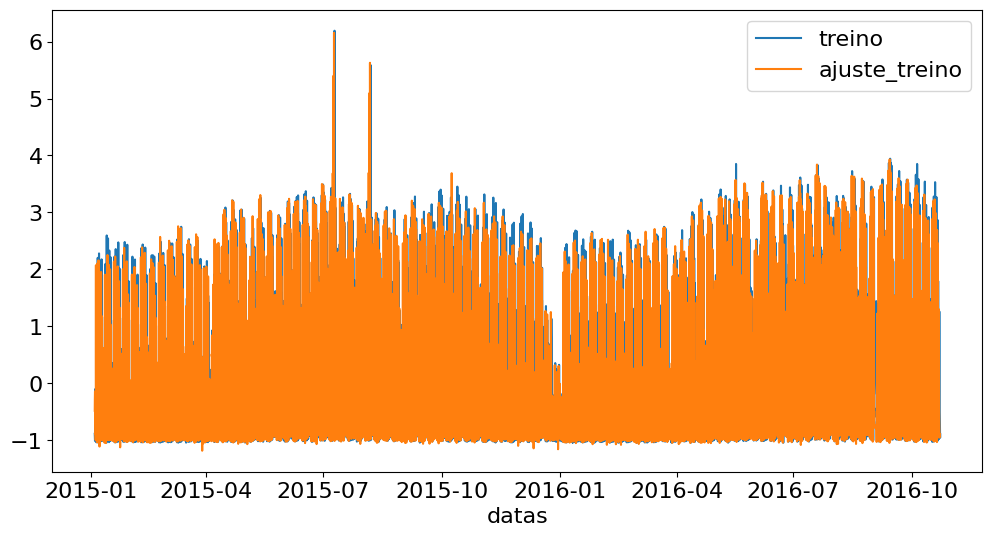

In [ ]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')



In [ ]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 6ms/step


In [ ]:
xteste_novo.shape

(1732, 10, 1)

<Axes: xlabel='datas'>

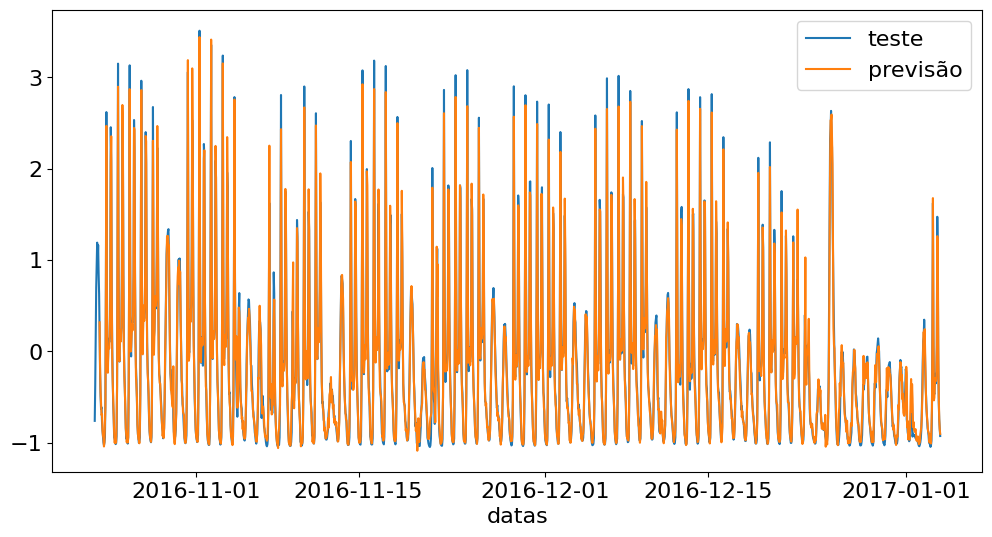

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)], label='previsão')



#GRU

As Gated Recurrent Units (GRUs) são uma variação mais simples de arquitetura de Redes Neurais Recorrentes (RNNs) em comparação com as Long Short-Term Memory (LSTM). Ao contrário das LSTMs, as GRUs possuem apenas dois portões principais: o portão de atualização e o portão de redefinição. Esses portões decidem quanto da informação anterior deve ser mantido e atualizado, e quanto deve ser esquecido para dar espaço a novas informações.

A simplicidade das GRUs as torna computacionalmente eficientes e mais fáceis de treinar em comparação com as LSTMs. Apesar de terem menos parâmetros, as GRUs frequentemente demonstram desempenho semelhante em várias tarefas. A escolha entre LSTMs e GRUs depende do contexto específico do problema, com experimentação prática muitas vezes sendo a melhor abordagem para determinar qual se adequa melhor a uma tarefa específica.

In [103]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()

In [104]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [105]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 128)               50304     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0237 - val_loss: 0.0147
Epoch 2/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0236 - val_loss: 0.0161
Epoch 3/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0232 - val_loss: 0.0203
Epoch 4/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0235 - val_loss: 0.0168
Epoch 5/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0229 - val_loss: 0.0149
Epoch 6/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0230 - val_loss: 0.0192
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0227 - val_loss: 0.0166
Epoch 8/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0225 - val_loss: 0.0197
Epoch 9/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0223 - val_loss: 0.0160
Epoch 10/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0226 - val

In [108]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 4ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

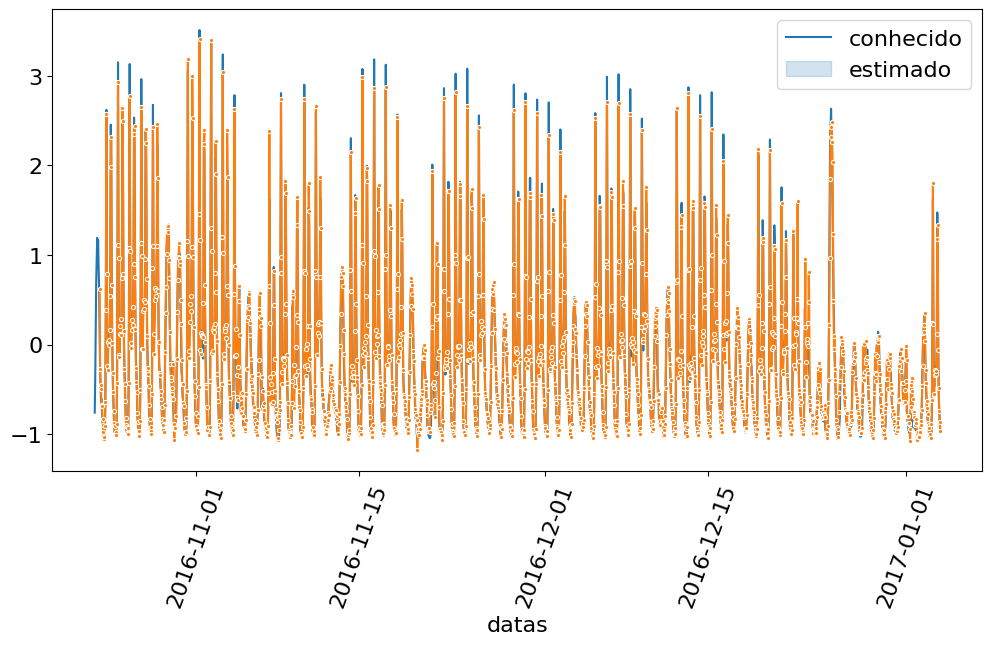

In [109]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70)

In [110]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


#Avaliando os modelos LSTM e GRU

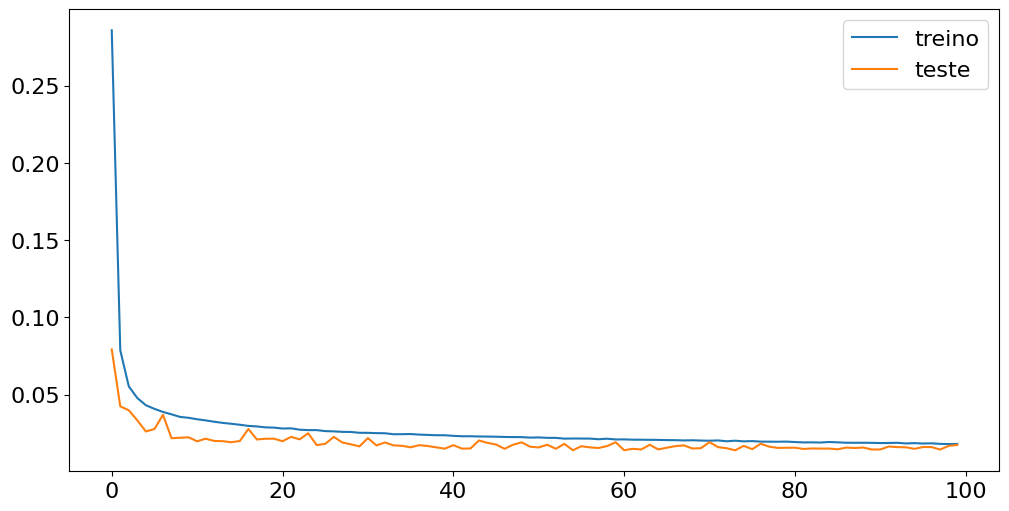

In [111]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

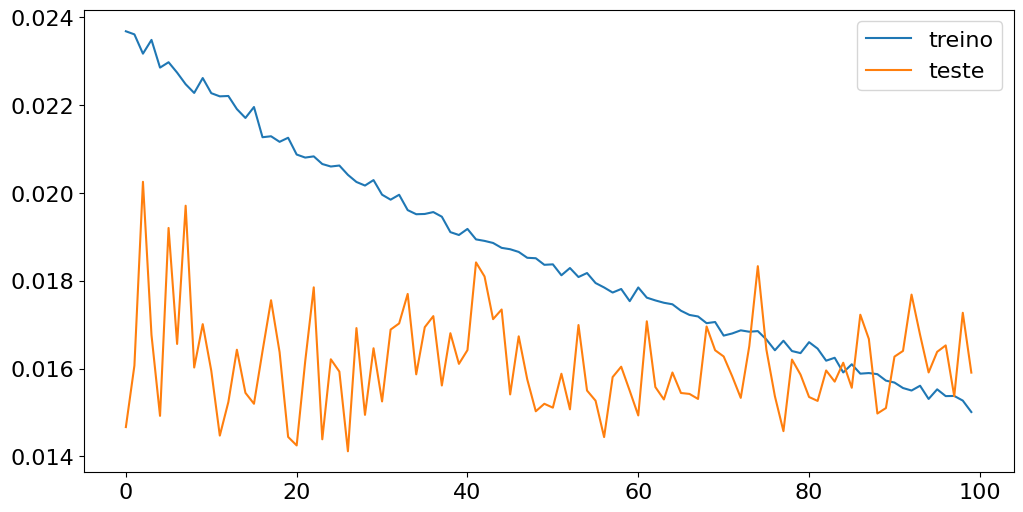

In [115]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
